<a href="https://colab.research.google.com/github/Sivateja2003/Google-Search-Engine/blob/main/google_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Interest Over Time (Top 10 rows):
            Cloud Computing  Artificial Intelligence  Machine Learning  \
date                                                                     
2024-09-15               10                       31                36   
2024-09-22               11                       32                40   
2024-09-29               11                       30                36   
2024-10-06               10                       30                37   
2024-10-13               10                       29                38   
2024-10-20               10                       29                38   
2024-10-27                8                       26                35   
2024-11-03               10                       28                38   
2024-11-10               11                       29                39   
2024-11-17               12                       30                39   

            isPartial  
date                   
2024-09-15      False  
2024-

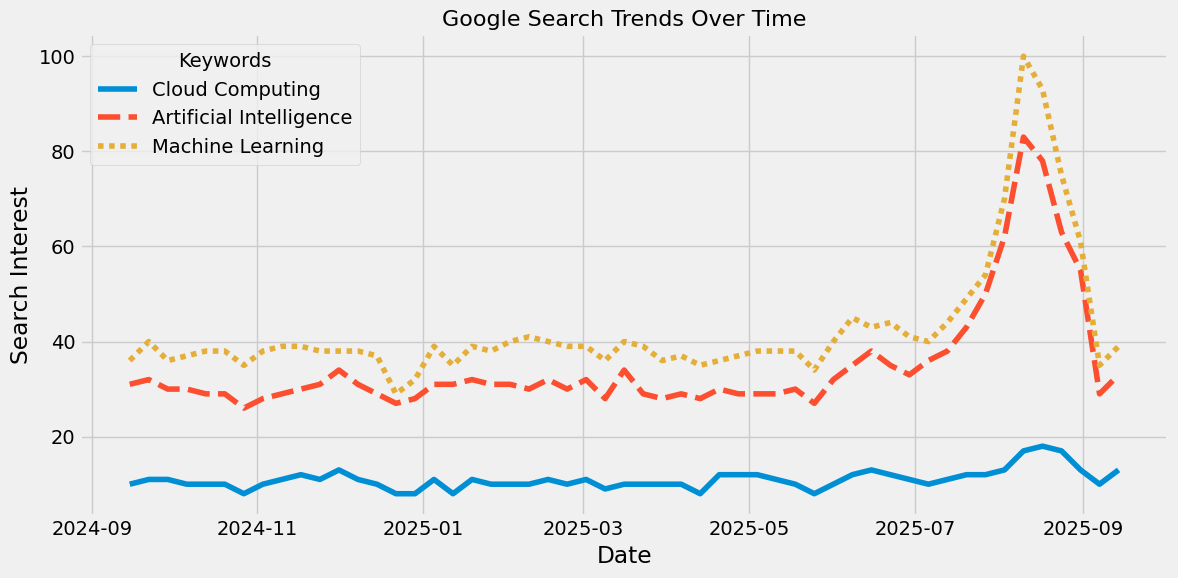


Top Regions by Search Interest:
                     Cloud Computing  Artificial Intelligence  \
geoName                                                         
Congo - Brazzaville               29                       19   
Congo - Kinshasa                  28                       26   
Nepal                             28                       32   
Cameroon                          26                       36   
Mali                              26                       23   
Gabon                             26                       29   
Liberia                           23                       63   
Bahamas                           22                       51   
Lesotho                           21                       57   
Brunei                            19                       54   

                     Machine Learning  
geoName                                
Congo - Brazzaville                52  
Congo - Kinshasa                   46  
Nepal                     

/tmp/ipython-input-4118914241.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions[keywords[0]], palette="viridis")


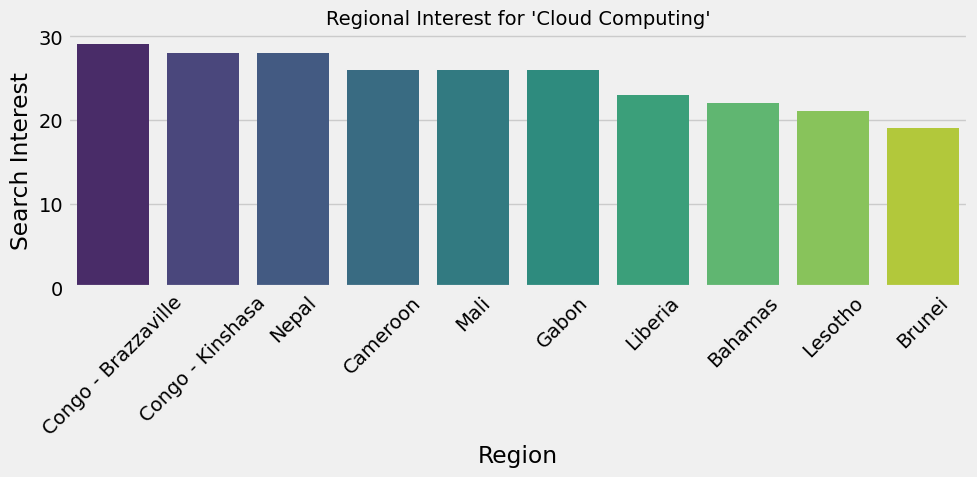


Related Queries:

Top related queries for 'Cloud Computing':
                         query  value
0                what is cloud    100
1      what is cloud computing     96
2  what is the cloud computing     43
3     cloud computing security     43
4           ai cloud computing     35

Top related queries for 'Artificial Intelligence':
                             query  value
0       ai artificial intelligence    100
1                               ai     96
2  what is artificial intelligence     38
3     artificial intelligence news     27
4      artificial intelligence pdf     23

Top related queries for 'Machine Learning':
                      query  value
0       ai machine learning    100
1  what is machine learning     63
2    machine learning model     45
3   ai and machine learning     43
4   python machine learning     36

Keyword Suggestions:
                                    title                       type
0               Cloud Computing Explained        Book by Joh

In [7]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

# =========================
# 1. Connect to Google Trends
# =========================
pytrends = TrendReq(hl='en-US', tz=360)

# Define keywords to track
keywords = ["Cloud Computing", "Artificial Intelligence", "Machine Learning"]

# Create outputs folder
os.makedirs("outputs", exist_ok=True)

# =========================
# 2. Interest Over Time
# =========================
pytrends.build_payload(keywords, cat=0, timeframe='today 12-m', geo='', gprop='')
time.sleep(5)  # avoid hitting API too fast
interest_over_time = pytrends.interest_over_time()

print("Interest Over Time (Top 10 rows):")
print(interest_over_time.head(10))

# Save data
interest_over_time.to_csv("outputs/interest_over_time.csv")

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=interest_over_time[keywords])
plt.title("Google Search Trends Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend(title="Keywords")
plt.tight_layout()
plt.savefig("outputs/interest_over_time.png")
plt.show()

# =========================
# 3. Regional Interest
# =========================
regional_interest = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
top_regions = regional_interest.sort_values(by=keywords[0], ascending=False).head(10)

print("\nTop Regions by Search Interest:")
print(top_regions)

# Save data
top_regions.to_csv("outputs/regional_interest.csv")

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_regions.index, y=top_regions[keywords[0]], palette="viridis")
plt.title(f"Regional Interest for '{keywords[0]}'", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Search Interest")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/regional_interest.png")
plt.show()

# =========================
# 4. Related Queries
# =========================
try:
    related_queries = pytrends.related_queries()
    print("\nRelated Queries:")
    for kw in keywords:
        if related_queries[kw]["top"] is not None:
            print(f"\nTop related queries for '{kw}':")
            top_queries = related_queries[kw]["top"].head(5)
            print(top_queries)
            # Save each keyword’s related queries
            top_queries.to_csv(f"outputs/related_queries_{kw.replace(' ', '_')}.csv")
except Exception as e:
    print(f"Error fetching related queries: {e}")

# =========================
# 5. Keyword Suggestions
# =========================
suggestions = pytrends.suggestions(keyword=keywords[0])
suggestions_df = pd.DataFrame(suggestions).drop(columns='mid')
print("\nKeyword Suggestions:")
print(suggestions_df)

# Save data
suggestions_df.to_csv("outputs/keyword_suggestions.csv", index=False)

# =========================
# 6. Rising Queries (Extra Feature)
# =========================
rising_trends = {}
for kw in keywords:
    if related_queries[kw]["rising"] is not None:
        rising = related_queries[kw]["rising"].head(5)
        rising_trends[kw] = rising
        rising.to_csv(f"outputs/rising_queries_{kw.replace(' ', '_')}.csv")

print("\nRising Queries saved for each keyword.")

# =========================
# 7. Project Summary
# =========================
summary = {
    "Total Keywords": len(keywords),
    "Top Region": top_regions.index[0] if not top_regions.empty else "N/A",
    "Files Generated": len(os.listdir("outputs"))
}

summary_df = pd.DataFrame([summary])
summary_df.to_csv("outputs/project_summary.csv", index=False)

print("\nProject Summary:")
print(summary_df)
